# Synthetic dataset testing, not used in the thesis

In [1]:
import pandas as pd
import numpy as np
import cython
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.datasets import make_classification
from CalculateMetrics import calculate_all_metrics
import matplotlib.pyplot as plt

data = make_classification(n_samples=10000, n_features=20, n_informative=16, n_redundant=4, random_state=42, n_classes=2)
X, y = data
X = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
y = pd.Series(y, name='target')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [2]:
def run_test(model, name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred = np.array(y_pred)
    if y_pred.ndim > 1:
        y_pred = np.array([np.argmax(pred) for pred in y_pred])
    y_proba = model.predict_proba(X_test)[:, 1]
    
    print(name)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
    print("Classification Report - Test:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    labels = ['Class 0', 'Class 1']
    print("Confusion Matrix:")
    print(f"{'':<20}{labels[0]:<20}{labels[1]:<20}")
    print(f"{labels[0]:<20}{cm[0, 0]:<20}{cm[0, 1]:<20}  # True Negative (TN), False Positive (FP)")
    print(f"{labels[1]:<20}{cm[1, 0]:<20}{cm[1, 1]:<20}  # False Negative (FN), True Positive (TP)")

    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.2f})")
    plt.plot([0, 1], [0, 1], "k--", label="Random guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

XGBoost Classifier
Accuracy: 0.9388
ROC AUC: 0.9840
Classification Report - Test:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1259
           1       0.95      0.93      0.94      1241

    accuracy                           0.94      2500
   macro avg       0.94      0.94      0.94      2500
weighted avg       0.94      0.94      0.94      2500

Confusion Matrix:
                    Class 0             Class 1             
Class 0             1195                64                    # True Negative (TN), False Positive (FP)
Class 1             89                  1152                  # False Negative (FN), True Positive (TP)


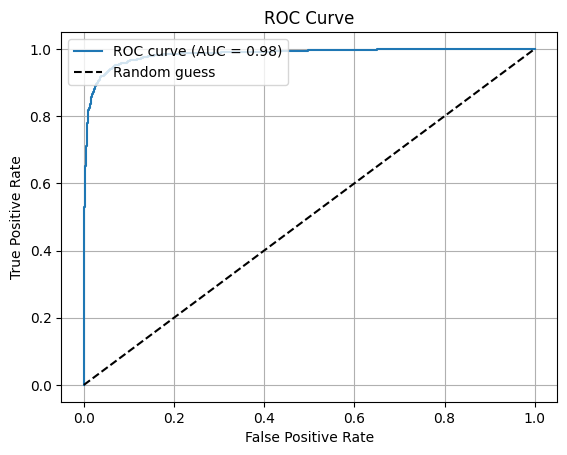

In [3]:
import xgboost as xgb

xgb = xgb.XGBClassifier()
run_test(xgb, "XGBoost Classifier", X_train, y_train, X_test, y_test)

Ender Classifier Bounded Fast
Accuracy: 0.7724
ROC AUC: 0.8621
Classification Report - Test:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78      1259
           1       0.78      0.75      0.77      1241

    accuracy                           0.77      2500
   macro avg       0.77      0.77      0.77      2500
weighted avg       0.77      0.77      0.77      2500

Confusion Matrix:
                    Class 0             Class 1             
Class 0             1003                256                   # True Negative (TN), False Positive (FP)
Class 1             313                 928                   # False Negative (FN), True Positive (TP)


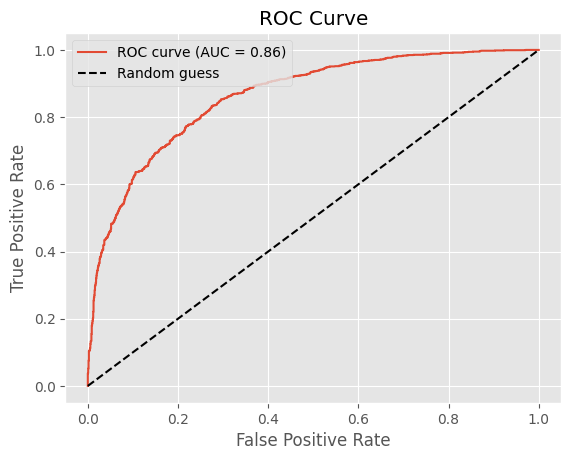

In [ ]:
from EnderClassifierBoundedFast import EnderClassifier as ECBF

ecbf = ECBF(verbose=False, n_rules=25, use_gradient=False)
run_test(ecbf, "Ender Classifier Bounded Fast", X_train, y_train, X_test, y_test)
#2.4s

Ender Classifier Bounded Fast with Gradient
Accuracy: 0.7668
ROC AUC: 0.8527
Classification Report - Test:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1259
           1       0.77      0.75      0.76      1241

    accuracy                           0.77      2500
   macro avg       0.77      0.77      0.77      2500
weighted avg       0.77      0.77      0.77      2500

Confusion Matrix:
                    Class 0             Class 1             
Class 0             981                 278                   # True Negative (TN), False Positive (FP)
Class 1             305                 936                   # False Negative (FN), True Positive (TP)


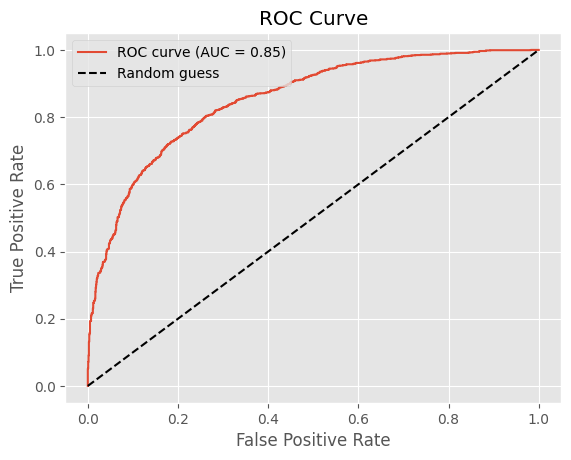

In [ ]:
ecbf = ECBF(verbose=False, n_rules=25, use_gradient=True)
run_test(ecbf, "Ender Classifier Bounded Fast with Gradient", X_train, y_train, X_test, y_test)
# Takes 5.4s, use_gradient=False takes 2.4s

Ender Classifier Modified
Accuracy: 0.8388
ROC AUC: 0.9232
Classification Report - Test:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1259
           1       0.81      0.88      0.84      1241

    accuracy                           0.84      2500
   macro avg       0.84      0.84      0.84      2500
weighted avg       0.84      0.84      0.84      2500

Confusion Matrix:
                    Class 0             Class 1             
Class 0             1001                258                   # True Negative (TN), False Positive (FP)
Class 1             145                 1096                  # False Negative (FN), True Positive (TP)


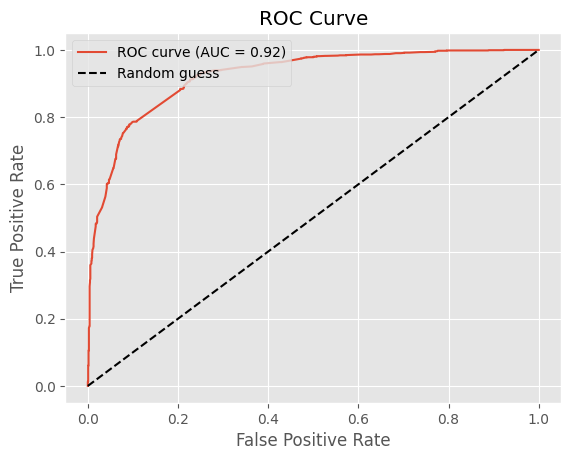

In [ ]:
from EnderClassifierModified import EnderClassifier as ECM

ecm = ECM(verbose=False, n_rules=25, use_gradient=False)
run_test(ecm, "Ender Classifier Modified", X_train, y_train, X_test, y_test)
# 1.1s

Ender Classifier Modified with Gradient
Accuracy: 0.8496
ROC AUC: 0.9241
Classification Report - Test:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1259
           1       0.84      0.87      0.85      1241

    accuracy                           0.85      2500
   macro avg       0.85      0.85      0.85      2500
weighted avg       0.85      0.85      0.85      2500

Confusion Matrix:
                    Class 0             Class 1             
Class 0             1048                211                   # True Negative (TN), False Positive (FP)
Class 1             165                 1076                  # False Negative (FN), True Positive (TP)


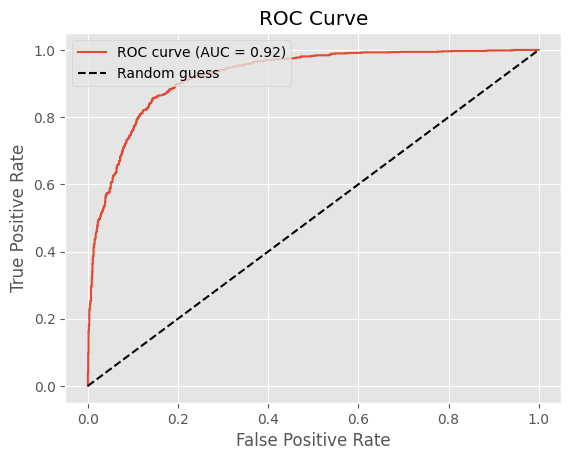

In [8]:
emc = ECM(verbose=False, n_rules=25, use_gradient=True)
run_test(emc, "Ender Classifier Modified with Gradient", X_train, y_train, X_test, y_test)
# 2.2s, use_gradient=False takes 1.1s